[*********************100%%**********************]  1 of 1 completed


GBM Price Prediction - MAE: 40.05495827631163
GBM Price Prediction - RMSE: 41.65876668795444


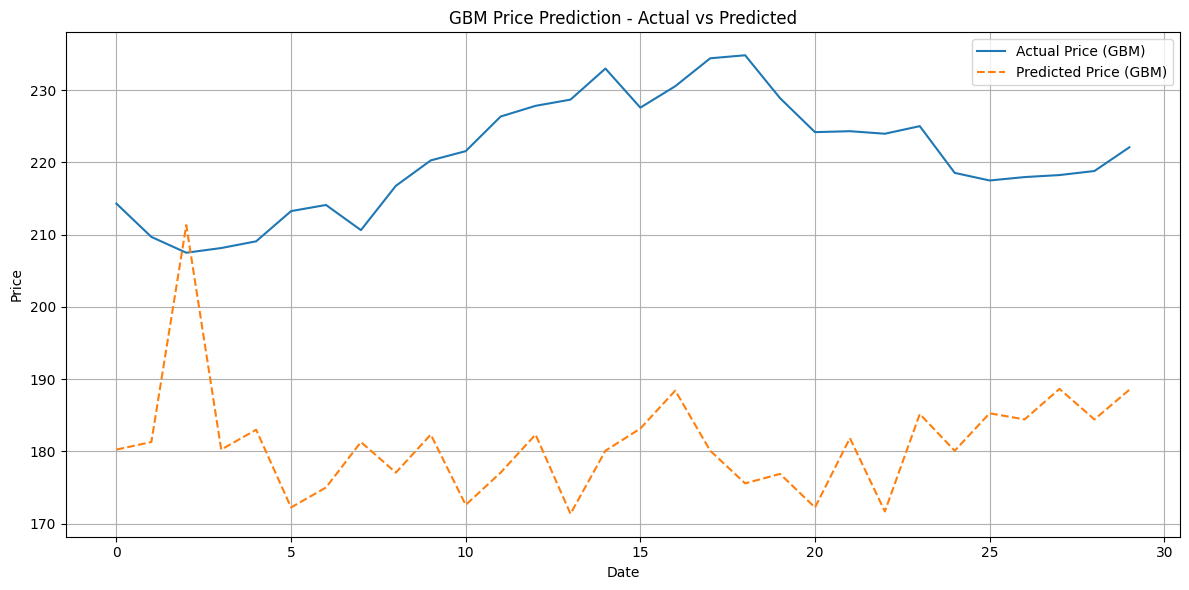

SVM Price Prediction - MAE: 37.40143830874452
SVM Price Prediction - RMSE: 38.14914160414409


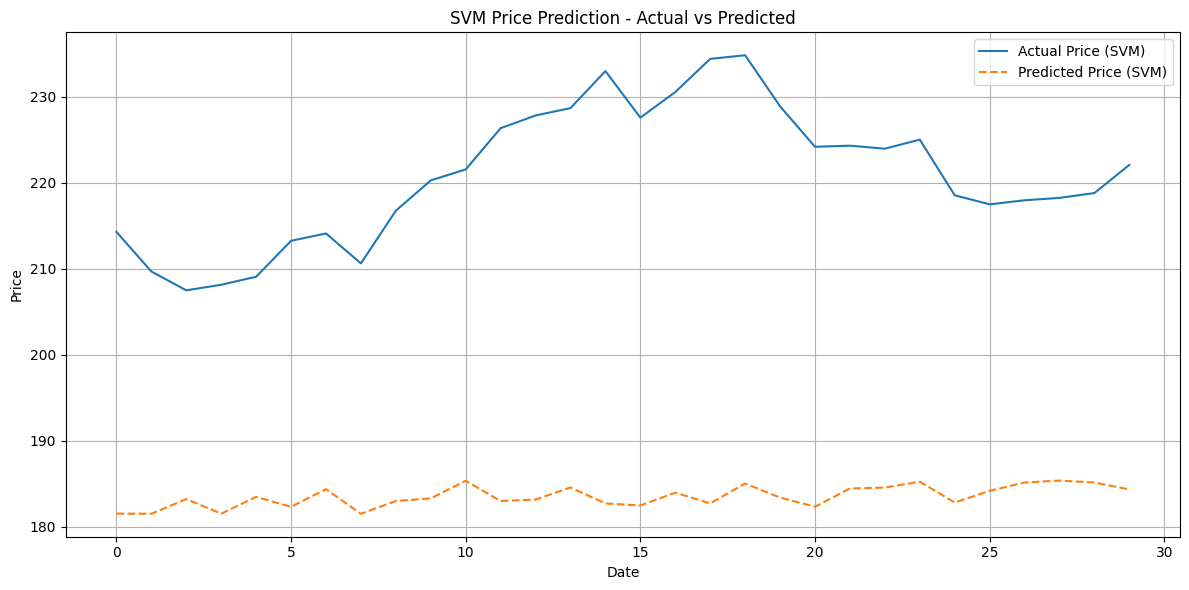

Epoch 1/40


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3429
Epoch 2/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1636e-04
Epoch 3/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0058e-06
Epoch 4/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0626e-05
Epoch 5/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0894e-05
Epoch 6/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6202e-05
Epoch 7/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0935e-05
Epoch 8/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2663e-05
Epoch 9/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3722e-05
Epoch 10/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6848e-04
Epoch 11/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0983e-05
Epoch 12/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9847e-04
Epoch 13/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9604e-05
Epoch 14/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8861e-04
Epoch 15/40
1

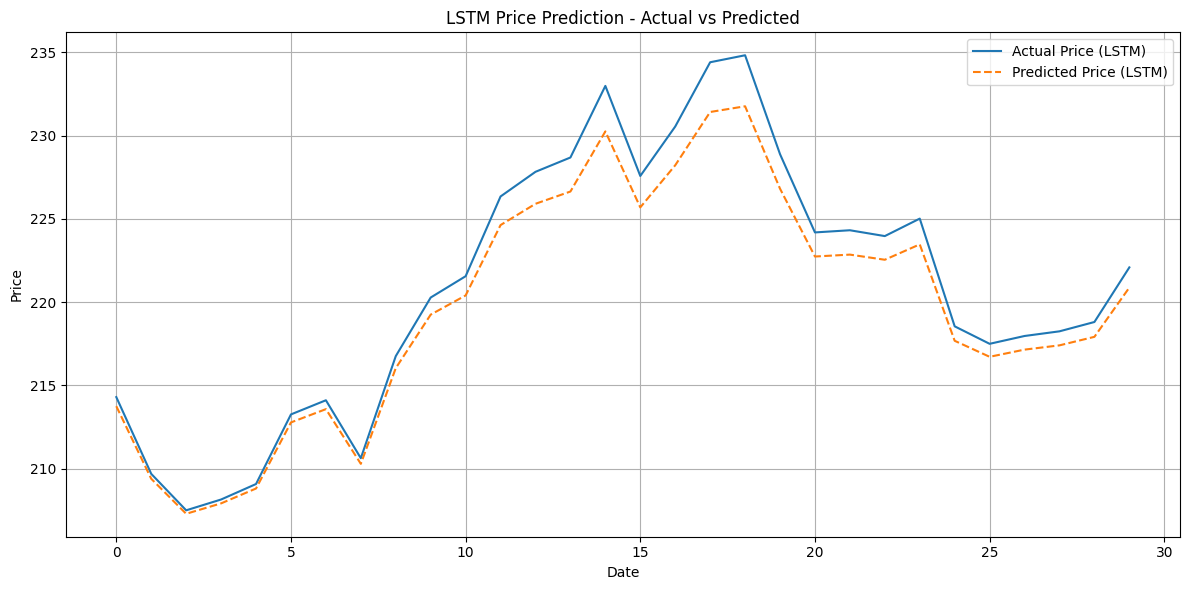

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -259.964
Distribution:                  Normal   AIC:                           527.928
Method:            Maximum Likelihood   BIC:                           539.835
                                        No. Observations:                  145
Date:                Fri, Aug 23 2024   Df Residuals:                      144
Time:                        22:27:01   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1575      0.119      1.320      0.187 [-7.63

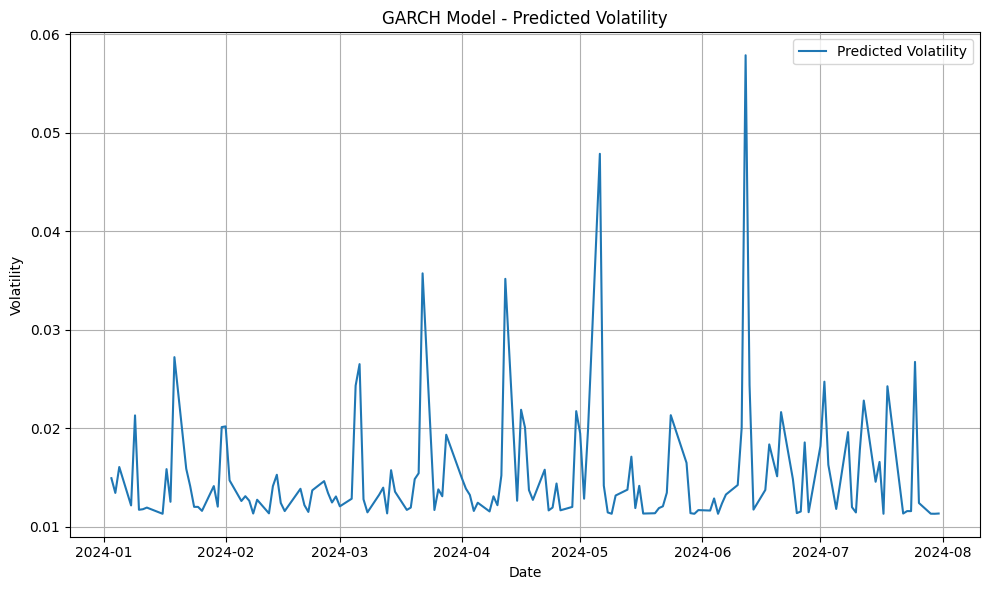

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from arch import arch_model

# Load data
def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Preprocess data
def preprocess_data(data):
    data = data[['Close', 'Volume']].dropna()
    data['Date'] = data.index
    data.set_index('Date', inplace=True)
    return data

# Plot predictions
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    
    if isinstance(y_test, np.ndarray):
        y_test = pd.Series(y_test, index=y_pred.index if hasattr(y_pred, 'index') else range(len(y_test)))
    if isinstance(y_pred, np.ndarray):
        y_pred = pd.Series(y_pred, index=y_test.index if hasattr(y_test, 'index') else range(len(y_pred)))
    
    plt.plot(y_test.index, y_test, label=f'Actual Price ({model_name})')
    plt.plot(y_pred.index, y_pred, label=f'Predicted Price ({model_name})', linestyle='--')
    plt.title(f'{model_name} Price Prediction - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train and evaluate GBM model
def train_gbm_model(data):
    X = data[['Volume']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"GBM Price Prediction - MAE: {mae}")
    print(f"GBM Price Prediction - RMSE: {rmse}")
    
    # Ensure indices align for plotting
    y_test = y_test.reset_index(drop=True)
    y_pred = pd.Series(y_pred, index=y_test.index)
    plot_predictions(y_test, y_pred, 'GBM')

# Train and evaluate SVM model
def train_svm_model(data):
    X = data[['Volume']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = SVR()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"SVM Price Prediction - MAE: {mae}")
    print(f"SVM Price Prediction - RMSE: {rmse}")
    
    # Ensure indices align for plotting
    y_test = y_test.reset_index(drop=True)
    y_pred = pd.Series(y_pred, index=y_test.index)
    plot_predictions(y_test, y_pred, 'SVM')

# Train and evaluate LSTM model
def train_lstm_model(data):
    # Prepare data for LSTM
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[['Close']])
    
    # Create features and target
    X = data_scaled
    y = data_scaled
    X = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshape for LSTM input
    y = y.reshape((y.shape[0], 1))  # Reshape for LSTM output
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Build LSTM model
    model = Sequential()
    model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(400))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train LSTM model
    model.fit(X_train, y_train, epochs=40, batch_size=1, verbose=1)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Inverse transform predictions
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    
    print(f"LSTM Price Prediction - MAE: {mae}")
    print(f"LSTM Price Prediction - RMSE: {rmse}")
    
    # Ensure indices align for plotting
    y_test_inv = pd.Series(y_test_inv.flatten(), index=np.arange(len(y_test_inv)))
    y_pred_inv = pd.Series(y_pred_inv.flatten(), index=np.arange(len(y_pred_inv)))
    
    plot_predictions(y_test_inv, y_pred_inv, 'LSTM')

# Train and evaluate GARCH model
def train_volatility_model(data):
    returns = data['Close'].pct_change().dropna()
    
    # Rescale returns to improve optimization
    returns_scaled = returns * 100
    
    model = arch_model(returns_scaled, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp="off")
    
    print(model_fit.summary())
    
    # Plot volatility predictions
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[1:], model_fit.conditional_volatility / 100, label='Predicted Volatility')
    plt.title('GARCH Model - Predicted Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main workflow
def main():
    ticker = 'AAPL'
    start_date = '2024-01-01'
    end_date = '2024-08-01'
    
    data = load_data(ticker, start_date, end_date)
    data = preprocess_data(data)
    
    train_gbm_model(data)
    train_svm_model(data)
    train_lstm_model(data)
    train_volatility_model(data)

if __name__ == "__main__":
    main()
